In [145]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import contextily as ctx

import matplotlib.pyplot as plt

In [146]:
df_add = pd.read_csv('../data/adresses.csv')

In [147]:
address_format = lambda x: '{}, {}, {}'.format(*x)
df_add['Adresse complète'] = df_add[['Adresse', 'Ville', 'Pays']].apply(address_format, axis=1)

In [148]:
df_add

,Adresse,Code postale,Ville,Pays,Adresse complète
0,2 bd Henri Sappia,6100,Nice,France,"2 bd Henri Sappia, Nice, France"
1,16 avenue Thiers,6000,Nice,France,"16 avenue Thiers, Nice, France"
2,33 Bd Dubouchage,6000,Nice,France,"33 Bd Dubouchage, Nice, France"


In [149]:
gdf_points = gpd.tools.geocode(df_add['Adresse complète'], provider='nominatim', user_agent='julius2718')

In [150]:
gdf_points.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

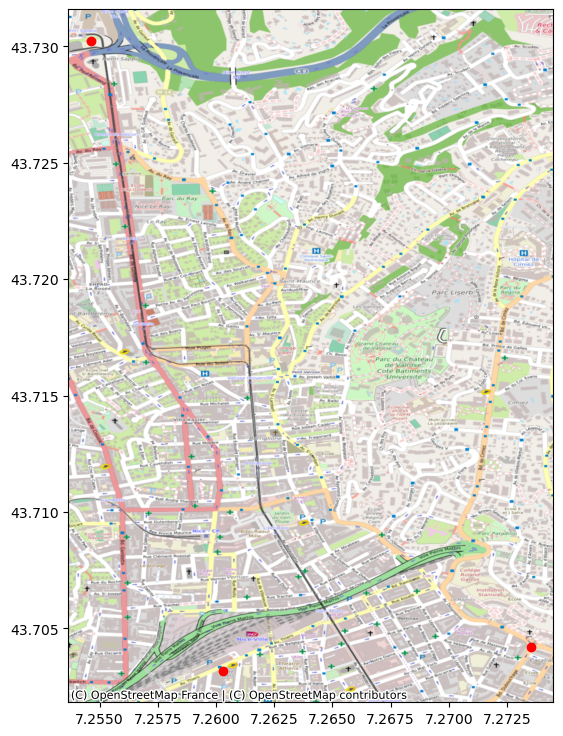

In [151]:
ax = gdf_points.plot(figsize=(9, 9), color='red')
ctx.add_basemap(ax, crs=gdf_points.crs.to_string(), source=ctx.providers.OpenStreetMap.France)

In [152]:
ax.figure.savefig('./test.png')

### Create a buffer of 300 m around the points

In [153]:
gdf_points

,geometry,address
0,POINT (7.25461 43.73024),"Régie Ligne d'Azur, 2, Boulevard Henri Sappia,..."
1,POINT (7.26030 43.70318),"Cogent Nice, 16, Avenue Thiers, Thiers, Vernie..."
2,POINT (7.27355 43.70422),"Boulevard Dubouchage, Carabacel, Nice, Alpes-M..."


In [154]:
gsr = gdf_points['geometry']

In [155]:
gsr = gsr.to_crs(3857)

In [156]:
gdf_buffers = gsr.buffer(300)

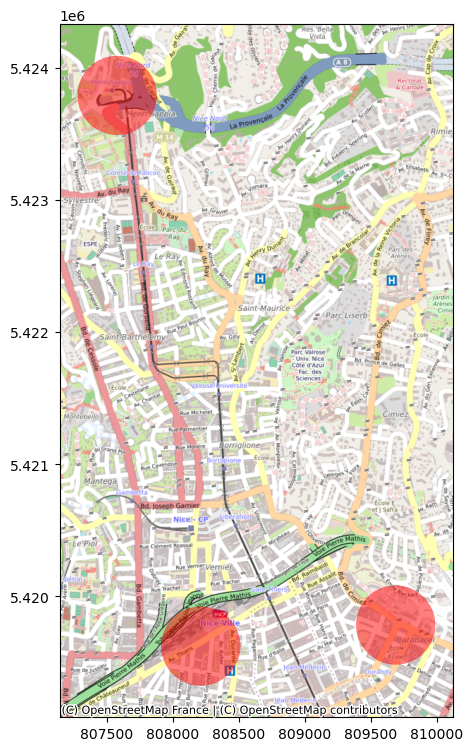

In [158]:
ax_buffers = gdf_buffers.plot(figsize=(9, 9), color='red', alpha=0.5)
ctx.add_basemap(ax_buffers, crs=gdf_buffers.crs.to_string(), source=ctx.providers.OpenStreetMap.France)